London Housing data analysis using python

Importing the dataset

In [1]:
import pandas as pd
lhdf = pd.read_csv('Datasets/London Housing Data.csv')
lhdf.head()

,date,area,average_price,code,houses_sold,no_of_crimes
0,1/1/1995,city of london,91449,E09000001,17.0,NaN
1,2/1/1995,city of london,82203,E09000001,7.0,NaN
2,3/1/1995,city of london,79121,E09000001,14.0,NaN
3,4/1/1995,city of london,77101,E09000001,7.0,NaN
4,5/1/1995,city of london,84409,E09000001,10.0,NaN


Inspecting the Dataset

In [2]:
lhdf.head(20)
lhdf.tail(20)
lhdf.columns
lhdf.shape
print(lhdf.describe())
lhdf.info()

       average_price    houses_sold  no_of_crimes
count   1.354900e+04   13455.000000   7439.000000
mean    2.635197e+05    3893.994129   2158.352063
std     1.876175e+05   12114.402476    902.087742
min     4.072200e+04       2.000000      0.000000
25%     1.323800e+05     247.000000   1623.000000
50%     2.229190e+05     371.000000   2132.000000
75%     3.368430e+05    3146.000000   2582.000000
max     1.463378e+06  132163.000000   7461.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13549 entries, 0 to 13548
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           13549 non-null  object 
 1   area           13549 non-null  object 
 2   average_price  13549 non-null  int64  
 3   code           13549 non-null  object 
 4   houses_sold    13455 non-null  float64
 5   no_of_crimes   7439 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 635.2+ KB


1. Converting the date column datatype from object to datetime

In [3]:
lhdf['date'] = pd.to_datetime(lhdf['date'])
lhdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13549 entries, 0 to 13548
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           13549 non-null  datetime64[ns]
 1   area           13549 non-null  object        
 2   average_price  13549 non-null  int64         
 3   code           13549 non-null  object        
 4   houses_sold    13455 non-null  float64       
 5   no_of_crimes   7439 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 635.2+ KB


2. Show all cases where the number of crimes is 0 and how many records exist.

In [4]:
lhdf[lhdf['no_of_crimes'] == 0]

,date,area,average_price,code,houses_sold,no_of_crimes
72,2001-01-01,city of london,284262,E09000001,24.0,0.0
73,2001-02-01,city of london,198137,E09000001,37.0,0.0
74,2001-03-01,city of london,189033,E09000001,44.0,0.0
75,2001-04-01,city of london,205494,E09000001,38.0,0.0
76,2001-05-01,city of london,223459,E09000001,30.0,0.0
...,...,...,...,...,...,...
178,2009-11-01,city of london,397909,E09000001,11.0,0.0
179,2009-12-01,city of london,411955,E09000001,16.0,0.0
180,2010-01-01,city of london,464436,E09000001,20.0,0.0
181,2010-02-01,city of london,490525,E09000001,9.0,0.0


In [5]:
#There are 104 records in where no crime was reported

3. What is the maximum and minimum value average price of houses per year in England

In [6]:
#creating a new column that holds only Year values
lhdf['Year'] = lhdf.date.dt.year

In [7]:
#selecting England from the DataFrame
value = lhdf[lhdf.area == 'england']
value

,date,area,average_price,code,houses_sold,no_of_crimes,Year
13248,1995-01-01,england,53203,E92000001,47639.0,NaN,1995
13249,1995-02-01,england,53096,E92000001,47880.0,NaN,1995
13250,1995-03-01,england,53201,E92000001,67025.0,NaN,1995
13251,1995-04-01,england,53591,E92000001,56925.0,NaN,1995
13252,1995-05-01,england,53678,E92000001,64192.0,NaN,1995
...,...,...,...,...,...,...,...
13544,2019-09-01,england,249942,E92000001,64605.0,NaN,2019
13545,2019-10-01,england,249376,E92000001,68677.0,NaN,2019
13546,2019-11-01,england,248515,E92000001,67814.0,NaN,2019
13547,2019-12-01,england,250410,E92000001,NaN,NaN,2019


In [8]:
max = value.groupby('Year').average_price.max()
min = value.groupby('Year').average_price.min()
print(max)
print(min)

Year
1995     53901
1996     55755
1997     61564
1998     65743
1999     75071
2000     84191
2001     95992
2002    119982
2003    138985
2004    160330
2005    167244
2006    182031
2007    194764
2008    191750
2009    174136
2010    180807
2011    177335
2012    180129
2013    188544
2014    203639
2015    219582
2016    231922
2017    242628
2018    248620
2019    250410
2020    247355
Name: average_price, dtype: int64
Year
1995     52788
1996     52333
1997     55789
1998     61659
1999     65522
2000     75219
2001     84245
2002     96215
2003    121610
2004    139719
2005    158572
2006    166544
2007    181824
2008    165795
2009    159340
2010    174458
2011    173046
2012    174161
2013    176816
2014    188265
2015    202856
2016    220361
2017    231593
2018    240428
2019    243281
2020    247355
Name: average_price, dtype: int64


4. What is the Maximun and Minimum number of crimes commited per area?

In [9]:
lhdf.groupby('area').no_of_crimes.max().sort_values(ascending=False)

area
westminster               7461.0
lambeth                   4701.0
camden                    4558.0
southwark                 3821.0
newham                    3668.0
hackney                   3466.0
ealing                    3401.0
islington                 3384.0
tower hamlets             3316.0
croydon                   3263.0
haringey                  3199.0
wandsworth                3051.0
waltham forest            2941.0
brent                     2937.0
barnet                    2893.0
greenwich                 2853.0
hillingdon                2819.0
hounslow                  2817.0
lewisham                  2813.0
enfield                   2798.0
kensington and chelsea    2778.0
hammersmith and fulham    2645.0
bromley                   2637.0
redbridge                 2560.0
barking and dagenham      2049.0
havering                  1956.0
bexley                    1914.0
harrow                    1763.0
merton                    1623.0
richmond upon thames      1551.0
sutto

In [10]:
lhdf.groupby('area').no_of_crimes.min().sort_values(ascending=False)

area
westminster               3504.0
lambeth                   2381.0
southwark                 2267.0
newham                    2130.0
camden                    2079.0
croydon                   2031.0
islington                 1871.0
ealing                    1871.0
hackney                   1870.0
brent                     1850.0
barnet                    1703.0
lewisham                  1675.0
tower hamlets             1646.0
enfield                   1635.0
wandsworth                1582.0
waltham forest            1575.0
haringey                  1536.0
hounslow                  1529.0
greenwich                 1513.0
redbridge                 1487.0
hillingdon                1445.0
bromley                   1441.0
kensington and chelsea    1347.0
hammersmith and fulham    1323.0
barking and dagenham      1217.0
havering                  1130.0
harrow                     937.0
bexley                     860.0
merton                     819.0
sutton                     787.0
richm

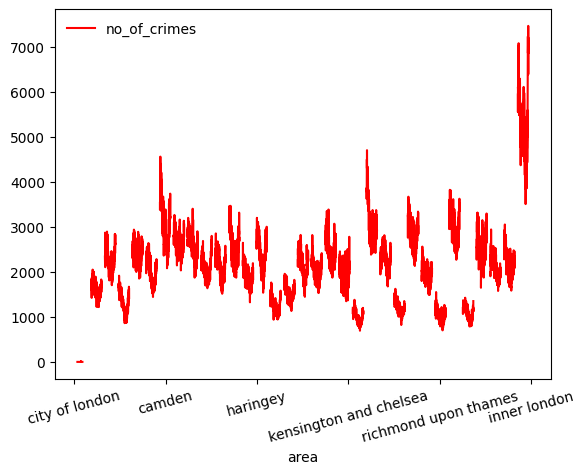

In [86]:
#Visual view on the number of crimes commited per area
import matplotlib.pyplot as plt
lhdf.plot('area', 'no_of_crimes', c='red')
plt.legend(frameon=False)

x = plt.gca().xaxis
for items in x.get_ticklabels():
    items.set_rotation(15)

5. Show the total count of each area where average price is less than 100,000

In [11]:
#all houses where average price is less than 100,000
lhdf[lhdf.average_price.lt(100000)]

,date,area,average_price,code,houses_sold,no_of_crimes,Year
0,1995-01-01,city of london,91449,E09000001,17.0,NaN,1995
1,1995-02-01,city of london,82203,E09000001,7.0,NaN,1995
2,1995-03-01,city of london,79121,E09000001,14.0,NaN,1995
3,1995-04-01,city of london,77101,E09000001,7.0,NaN,1995
4,1995-05-01,city of london,84409,E09000001,10.0,NaN,1995
...,...,...,...,...,...,...,...
13330,2001-11-01,england,95083,E92000001,109149.0,NaN,2001
13331,2001-12-01,england,95992,E92000001,93329.0,NaN,2001
13332,2002-01-01,england,96215,E92000001,71678.0,NaN,2002
13333,2002-02-01,england,96676,E92000001,77131.0,NaN,2002


In [66]:
#Total count of each area where average price is less than 100,000
lhdf[lhdf.average_price.lt(100000)].area.value_counts()

north east              112
north west              111
yorks and the humber    110
east midlands            96
west midlands            94
england                  87
barking and dagenham     85
south west               78
east of england          76
newham                   72
bexley                   64
waltham forest           64
lewisham                 62
havering                 60
south east               59
greenwich                59
croydon                  57
enfield                  54
sutton                   54
hackney                  53
redbridge                52
southwark                48
tower hamlets            47
outer london             46
hillingdon               44
lambeth                  41
hounslow                 41
brent                    40
london                   39
merton                   35
haringey                 33
bromley                  33
inner london             31
ealing                   31
kingston upon thames     30
harrow              

6. The year most of the houses were sold

<AxesSubplot: xlabel='date'>

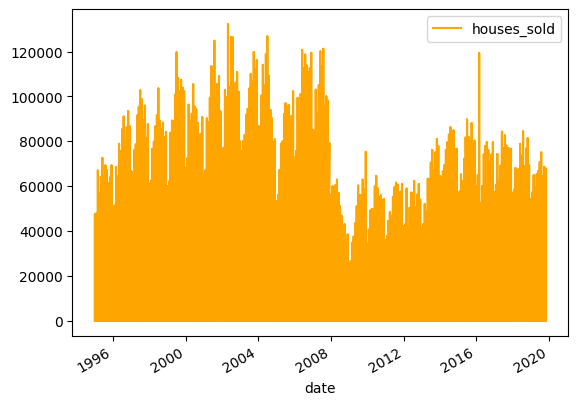

In [54]:
lhdf.plot('date', 'houses_sold', c='orange')

In [67]:
lhdf.to_csv('london_housing.csv', index = False)